In [1]:
import pandas as pd 

In [3]:
permit = pd.read_csv('Building_Permits.csv')
permit.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,StatusCurrent,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,6780707-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN
1,6228131-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,7126 55TH AVE S,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.538156,-122.263765,"7126 55TH AVE S\nSEATTLE, WA 98118\n(47.538155..."
2,6713901-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN
3,6089473-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,5270 RAINIER AVE S,SEATTLE,WA,98118.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.554556,-122.281417,"5270 RAINIER AVE S\nSEATTLE, WA 98118\n(47.554..."
4,6799136-CN,NaN,NaN,Building,NaN,NaN,NaN,NaN,NaN,NaN,...,Additional Info Requested,NaN,NaN,NaN,NaN,NaN,https://cosaccela.seattle.gov/portal/customize...,NaN,NaN,NaN


In [4]:
len(permit)

142705

In [5]:
permit.columns

Index(['PermitNum', 'PermitClass', 'PermitClassMapped', 'PermitTypeMapped',
       'PermitTypeDesc', 'Description', 'HousingUnits', 'HousingUnitsRemoved',
       'HousingUnitsAdded', 'EstProjectCost', 'AppliedDate', 'IssuedDate',
       'ExpiresDate', 'CompletedDate', 'StatusCurrent', 'OriginalAddress1',
       'OriginalCity', 'OriginalState', 'OriginalZip', 'ContractorCompanyName',
       'Link', 'Latitude', 'Longitude', 'Location1'],
      dtype='object')

In [6]:
permit.AppliedDate

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
142700    2013-04-24
142701    2017-10-09
142702    2015-07-09
142703    2015-06-02
142704    2013-05-09
Name: AppliedDate, Length: 142705, dtype: object

In [8]:
permit.AppliedDate.value_counts(dropna=False).head()

NaN           17697
2005-11-17      118
2016-06-17      111
2016-06-23       95
2013-12-23       85
Name: AppliedDate, dtype: int64

In [31]:
# Remove all the na rows
permit_nonna = permit[permit['AppliedDate'].notna()]
# Remove all the columns except AppliedDate 
permit_date = permit_nonna[['AppliedDate']].reset_index(drop=True)
permit_date.head()

,AppliedDate
0,2018-05-24
1,2018-11-14
2,2020-11-06
3,2018-11-16
4,2007-08-09


In [40]:
import datetime 

# Covert applieddate to datetime format
fixed_date = permit_date.copy()
fixed_date['AppliedDate'] = fixed_date['AppliedDate'].apply(pd.to_datetime)
fixed_date = fixed_date.set_index(fixed_date.AppliedDate)
fixed_date.head(10)

,AppliedDate
AppliedDate,
2018-05-24,2018-05-24
2018-11-14,2018-11-14
2020-11-06,2020-11-06
2018-11-16,2018-11-16
2007-08-09,2007-08-09
2020-11-25,2020-11-25
2015-05-11,2015-05-11
2018-07-12,2018-07-12
2020-09-22,2020-09-22


In [39]:
# Group by month
grouped = fixed_date.resample('M').count()
data = pd.DataFrame({'count': grouped.values.flatten()}, index=grouped.index)
data.head()

,count
AppliedDate,
1986-04-30,1
1986-05-31,0
1986-06-30,0
1986-07-31,0
1986-08-31,0


<AxesSubplot:xlabel='AppliedDate'>

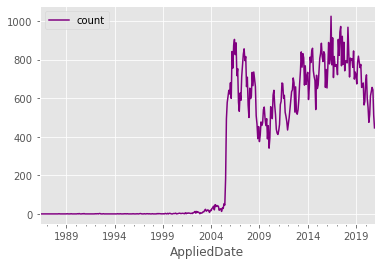

In [41]:
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.style.use('ggplot')

data.plot(color='purple')

In [42]:
# Remove data is before 2006

def is_after_2006(date):
    return (date > datetime.datetime(2006, 1, 1) and date < datetime.datetime(2019, 10, 1))

data = data[data.index.to_series().apply(is_after_2006)]

<AxesSubplot:xlabel='AppliedDate'>

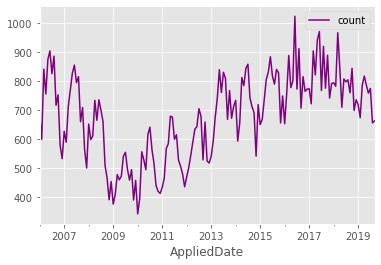

In [44]:
data.plot(color='purple')

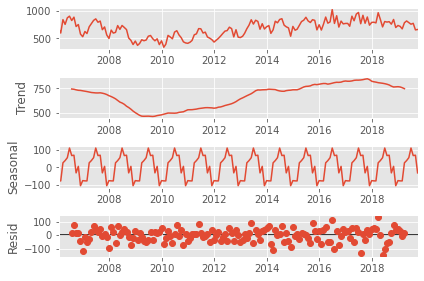

In [50]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data)
figure = result.plot()